In [1]:
from quantileNetwork import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# import tables # Doesn't seem to want to import

## Data Processing

In [2]:
df_data = pd.read_csv("iqn_data_test_nans_removed.csv").set_index('ievt_n').drop(columns=['Unnamed: 0'])
df_data

,E1,E2,E3,E4,Esum,dt1,dt2,dt3,dt4,Es,AoEs
ievt_n,,,,,,,,,,,
17,0.634874,0.365126,0.000000,0.000000,510.739327,1960.000000,1960.000000,0.000000,0.000000,186.69972,0.820916
44,0.270419,0.212295,0.069841,0.063306,3197.692476,1960.000000,1960.000000,876.716761,1960.000000,3195.52600,0.651721
47,0.364312,0.151714,0.131527,0.109987,2614.504354,1502.651831,1503.432069,1496.254273,1494.440125,2615.93240,0.782426
49,0.428585,0.101360,0.090956,0.087043,2345.009424,1417.137042,1639.055150,1552.324325,1487.036867,2344.14550,0.844731
56,0.446100,0.155380,0.119556,0.107587,804.326144,787.793332,1219.888211,1757.184180,499.627311,803.77106,0.530038
...,...,...,...,...,...,...,...,...,...,...,...
371313,0.841064,0.158936,0.000000,0.000000,510.739327,1759.290350,1722.901195,0.000000,0.000000,510.64694,0.826891
371320,0.368661,0.349510,0.140842,0.042714,2103.505444,1416.900482,1416.845315,1638.564482,1412.749597,2102.31860,0.663945
371327,0.348347,0.134544,0.128567,0.071051,2232.180183,1740.570243,1743.573862,1744.408528,1788.674797,2233.14160,0.781660


In [3]:
xdata = df_data[['E1', 'E2', 'Esum', 'dt1', 'dt2']].to_numpy()
xdata

array([[6.34874379e-01, 3.65125621e-01, 5.10739327e+02, 1.96000000e+03,
        1.96000000e+03],
       [2.70419179e-01, 2.12294981e-01, 3.19769248e+03, 1.96000000e+03,
        1.96000000e+03],
       [3.64311764e-01, 1.51714459e-01, 2.61450435e+03, 1.50265183e+03,
        1.50343207e+03],
       ...,
       [3.48347399e-01, 1.34543901e-01, 2.23218018e+03, 1.74057024e+03,
        1.74357386e+03],
       [3.60946589e-01, 1.39541290e-01, 2.32957382e+03, 1.24670102e+03,
        1.26121663e+03],
       [3.20195188e-01, 1.44460449e-01, 2.61450435e+03, 1.25713998e+03,
        1.25679801e+03]])

In [4]:
ydata = df_data[['Es', 'AoEs']].to_numpy()
ydata

array([[1.8669972e+02, 8.2091640e-01],
       [3.1955260e+03, 6.5172094e-01],
       [2.6159324e+03, 7.8242564e-01],
       ...,
       [2.2331416e+03, 7.8165966e-01],
       [2.3310269e+03, 7.9087980e-01],
       [2.6142559e+03, 7.7416390e-01]])

In [5]:
train_in = xdata
train_out = ydata

In [6]:
train_in

array([[6.34874379e-01, 3.65125621e-01, 5.10739327e+02, 1.96000000e+03,
        1.96000000e+03],
       [2.70419179e-01, 2.12294981e-01, 3.19769248e+03, 1.96000000e+03,
        1.96000000e+03],
       [3.64311764e-01, 1.51714459e-01, 2.61450435e+03, 1.50265183e+03,
        1.50343207e+03],
       ...,
       [3.48347399e-01, 1.34543901e-01, 2.23218018e+03, 1.74057024e+03,
        1.74357386e+03],
       [3.60946589e-01, 1.39541290e-01, 2.32957382e+03, 1.24670102e+03,
        1.26121663e+03],
       [3.20195188e-01, 1.44460449e-01, 2.61450435e+03, 1.25713998e+03,
        1.25679801e+03]])

In [7]:
train_out

array([[1.8669972e+02, 8.2091640e-01],
       [3.1955260e+03, 6.5172094e-01],
       [2.6159324e+03, 7.8242564e-01],
       ...,
       [2.2331416e+03, 7.8165966e-01],
       [2.3310269e+03, 7.9087980e-01],
       [2.6142559e+03, 7.7416390e-01]])

Text(0.5, 0, 'train_in[2] == Esum (normalised)')

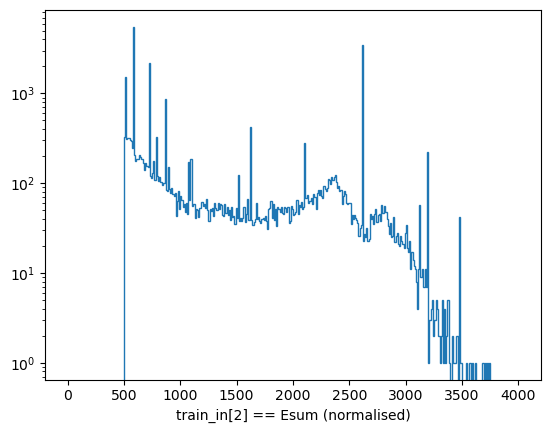

In [8]:
plt.figure()

_ = plt.hist(
    train_in[:, 2], range=(0,4000), bins=400, histtype='step'
)
plt.yscale('log')
plt.xlabel('train_in[2] == Esum (normalised)')


In [9]:
## Do a test train split
train_in_split, test_in, train_out_split, test_out = train_test_split(
    train_in,
    train_out,
    test_size=1/3,
    random_state=42
)

In [10]:
len(xdata), len(train_in), len(train_in_split), len(test_in) 

(32692, 32692, 21794, 10898)

In [11]:
# normalise output
input_dims  = len(train_in.T)
output_dims = len(train_out.T)

norm_info_in =[[0,1] for i in range(input_dims)]  # µ and stdev
norm_info_out=[[0,1] for i in range(output_dims)] # µ and stdev

train_in_norm = train_in_split.copy()
train_out_norm = train_out_split.copy()
test_in_norm = test_in.copy()
test_out_norm = test_out.copy()

for x in range(input_dims):
    norm_info_in[x] = [np.mean(train_in_split[:,x]), np.std(train_in_split[:,x])]
    train_in_norm[:,x]=(train_in_split[:,x]-np.mean(train_in_split[:,x]))/(np.std(train_in_split[:,x]))
    test_in_norm[:,x]=(test_in[:,x]-np.mean(train_in_split[:,x]))/(np.std(train_in_split[:,x]))

for x in range(output_dims):
    norm_info_out[x] = [np.mean(train_out_split[:,x]), np.std(train_out_split[:,x])]
    train_out_norm[:,x]=(train_out_split[:,x]-np.mean(train_out_split[:,x]))/(np.std(train_out_split[:,x]))
    test_out_norm[:,x]=(test_out[:,x]-np.mean(train_out_split[:,x]))/(np.std(train_out_split[:,x]))

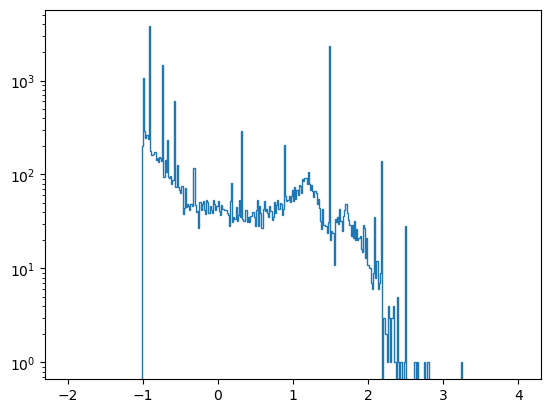

In [12]:
plt.figure()

_ = plt.hist(
    train_in_norm[:, 2], range=(-2,4), bins=400, histtype='step'
)
plt.yscale('log')


In [13]:
x_val, y_val = make_dataset(
    train_in_norm,          # input x
    train_out_norm,         # input y
    input_dims,             # x dims
    output_dims,            # y dims
    train_in_norm.shape[0]  # number of samples
) # examples


In [14]:
# in out case x_val should be twice as long a out training data
len(train_in_norm), len(x_val)

(21794, 43588)

In [15]:
x_val

array([[-0.40112448,  0.65913024, -0.9078459 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.13917434,  0.19491129, -0.9078459 , ...,  1.        ,
         0.        ,  0.        ],
       [-0.72207904,  0.33378122,  1.90235729, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11668685,  0.59356828, -0.58113423, ...,  0.        ,
         1.        , -0.51608398],
       [ 0.70329971, -0.48999606, -0.8908067 , ...,  0.        ,
         1.        , -0.8255462 ],
       [ 2.01273507, -1.16229535, -0.85153877, ...,  0.        ,
         1.        , -0.78680316]])

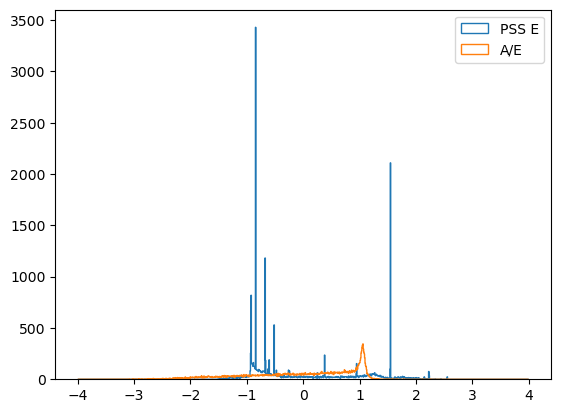

In [16]:
plt.figure()

_ = plt.hist(
    y_val[:len(train_in_norm)], range=(-4, 4), bins=1000, histtype='step', label='PSS E'
)
_ = plt.hist(
    y_val[len(train_in_norm):], range=(-4, 4), bins=1000, histtype='step', label='A/E'
)
plt.legend()

## Define the Model

Parameters to choose: (defaults taken from paper)
> hidden:    default=5,     Number of hidden layers   
> width:     default=50,    Width of the hidden layers  
> alpha:     default=0.2,   Slope for leaky relu  
> initialLR: default=0.001, Initial learning rate  
> batch:     default=512,   Batch size  
> cycles:    default=4,     Number of cylces to train for  
> epochs:    default=100,   Number of epochs in a cylce  
> patience:  default=100,   Number of epochs with no improvement before ending  

In [17]:
width       = 50
hidden      = 5
patience    = 100
cycles      = 4
initiallr   = 0.001
epochs      = 100
batch       = 512


In [18]:
model = QuantileNet(network_type="not normalizing")

model.add(
    tf.keras.layers.Dense(
        width,
        kernel_initializer="glorot_uniform",
        activation=None
    )
)
model.add(tf.keras.layers.LeakyReLU())#alpha=alpha))

for n in range(hidden - 1):
    model.add(
        tf.keras.layers.Dense(
            width,
            kernel_initializer="glorot_uniform",
            activation=None
        )
    )
    model.add(tf.keras.layers.LeakyReLU())#alpha=alpha))

model.add(
    tf.keras.layers.Dense(
        1,
        kernel_initializer="glorot_uniform",
        activation=None
    )
)

In [19]:
## Do another test train split for validation data
iqn_train_in, iqn_val_in, iqn_train_out, iqn_val_out = train_test_split(
    x_val,
    y_val,
    test_size=1/10,
    random_state=42
)

callbackMetric="val_loss"

callback = tf.keras.callbacks.EarlyStopping(
    monitor=callbackMetric,
    patience=patience,
    restore_best_weights=True
)

iqn_train_out = tf.expand_dims(iqn_train_out,1)
iqn_val_out = tf.expand_dims(iqn_val_out,1)

In [20]:
epoch_list=[]
train_loss_list=[]
val_loss_list=[]

for x in range(cycles):
    
    model.compile(
        # optimizer=tf.keras.optimizers.Adam(
        optimizer=tf.keras.optimizers.legacy.Adam(
            initiallr * (10**(-x)),
            amsgrad=False
        ),
        loss=model.loss,
        run_eagerly=False
    )

    history = model.fit(
        iqn_train_in,
        iqn_train_out,
        validation_data=(
            iqn_val_in,
            iqn_val_out
        ),
        epochs      = epochs,
        batch_size  = batch,
        verbose     = 2,
        callbacks   = [callback] #, callback2])
    )
    
    train_loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epoch_list.append(len(train_loss))
    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)
    #Save the network
    model.save('emulator.keras')

epoch_list = range(1,sum(epoch_list)+1)
train_loss = np.concatenate(train_loss_list, axis=0)
val_loss = np.concatenate(val_loss_list, axis=0)

Epoch 1/100
77/77 - 1s - loss: 0.2584 - val_loss: 0.1660 - 1s/epoch - 19ms/step
Epoch 2/100
77/77 - 1s - loss: 0.1496 - val_loss: 0.1420 - 614ms/epoch - 8ms/step
Epoch 3/100
77/77 - 1s - loss: 0.1381 - val_loss: 0.1336 - 628ms/epoch - 8ms/step
Epoch 4/100
77/77 - 1s - loss: 0.1319 - val_loss: 0.1346 - 627ms/epoch - 8ms/step
Epoch 5/100
77/77 - 1s - loss: 0.1285 - val_loss: 0.1328 - 643ms/epoch - 8ms/step
Epoch 6/100
77/77 - 1s - loss: 0.1259 - val_loss: 0.1256 - 624ms/epoch - 8ms/step
Epoch 7/100
77/77 - 1s - loss: 0.1241 - val_loss: 0.1287 - 662ms/epoch - 9ms/step
Epoch 8/100
77/77 - 1s - loss: 0.1231 - val_loss: 0.1252 - 733ms/epoch - 10ms/step
Epoch 9/100
77/77 - 1s - loss: 0.1224 - val_loss: 0.1223 - 716ms/epoch - 9ms/step
Epoch 10/100
77/77 - 1s - loss: 0.1220 - val_loss: 0.1229 - 696ms/epoch - 9ms/step
Epoch 11/100
77/77 - 1s - loss: 0.1212 - val_loss: 0.1226 - 679ms/epoch - 9ms/step
Epoch 12/100
77/77 - 1s - loss: 0.1202 - val_loss: 0.1188 - 629ms/epoch - 8ms/step
Epoch 13/100
7

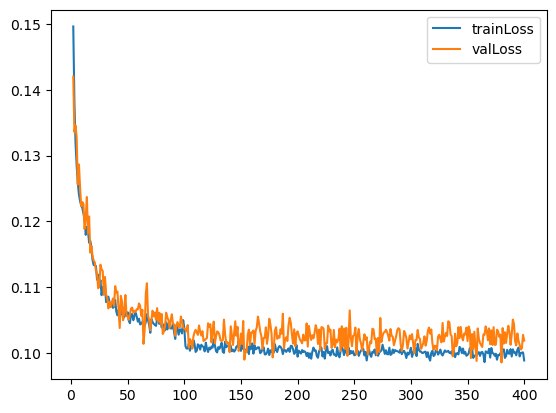

In [21]:
plt.figure()
plt.plot(epoch_list[1:], train_loss[1:], label="trainLoss")
plt.plot(epoch_list[1:], val_loss[1:], label="valLoss")
plt.legend()
# plt.savefig(networkname+"_loss_curve.png")

## Evaluate the trained model

In [22]:
x = [test_out_norm[:,0]]
y = [test_out_norm[:,1]]

# Make the correct input data for the IQN
in_val     = np.zeros(shape=np.array(x).shape)
test_data_set_y = np.concatenate([test_in_norm.T, in_val+1, in_val,   in_val, x], axis=0)
test_data_set_x = np.concatenate([test_in_norm.T, in_val,   in_val+1, x,      y], axis=0)
test_data_set  = np.concatenate([test_data_set_x, test_data_set_y], axis=1)


iqn_test_in = test_data_set[:-1,:].T
iqn_test_out = np.expand_dims(test_data_set[-1,:],1)

In [23]:
model.evaluate(iqn_test_in, iqn_test_out, verbose=2, batch_size=128) #131072)

171/171 - 1s - loss: 0.1006 - 511ms/epoch - 3ms/step


0.10063111037015915

## Start Sampling from the trained IQN

In [24]:
new_train_in = xdata
new_train_out = ydata

# new_train_out=(new_train_out+10)/(new_train_in+10) # not possible with different input and output dims

new_norm_info_in  = [[0,1] for i in range(input_dims)]
new_norm_info_out = [[0,1] for i in range(output_dims)]
new_train_in, new_test_in, new_train_out, new_test_out = train_test_split(
    new_train_in,
    new_train_out,
    test_size=1/3,
    random_state=42
)

new_test_in_norm = new_test_in.copy()
#Normalization 
for x in range(input_dims):
    new_norm_info_in[x]=[np.mean(new_train_in[:,x]),np.std(new_train_in[:,x])]
    new_test_in_norm[:,x]=(new_test_in[:,x]-np.mean(new_train_in[:,x]))/(np.std(new_train_in[:,x]))

for x in range(output_dims):
    new_norm_info_out[x]=[np.mean(new_train_out[:,x]),np.std(new_train_out[:,x])]

In [25]:
sample_num=1000
batch_size = 1000
ROW_SIZE = test_in_norm.shape[0]
NUM_COLUMNS = sample_num*output_dims

# The following is good for really large datasets but I can't get it
# to work on my computer
'''filename = 'emulator.h5'
f = tables.open_file(filename, mode='w')
atom = tables.Float32Atom()
all_data = f.create_earray(f.root, 'data', atom, (0, NUM_COLUMNS))'''

all_data = pd.DataFrame(columns=[f'col_{i}' for i in range(NUM_COLUMNS)], dtype=np.float32)

In [26]:
for y in range(0, new_test_in_norm.shape[0], batch_size):

    current_test_in = new_test_in_norm[y:min(y+batch_size, test_in.shape[0]),:]
    current_test_in = tf.transpose(current_test_in)
    current_test_in = tf.cast(current_test_in, tf.float32)

    out = sample_net(
        model, #Network
        sample_num, #Number of samples
        current_test_in, #Input
        current_test_in.shape[1], #Number of examples (batch size)
        current_test_in.shape[0], #5d input
        output_dims, #2d output
        network_type="not normalizing"
    ) 
    out = np.array(out)
    
    current_test_in = np.array(current_test_in).T

    for x in range(output_dims):
        out[:,:,x] = out[:,:,x]*norm_info_out[x][1]+norm_info_out[x][0]
        current_test_in[:,x] = current_test_in[:,x]*norm_info_in[x][1]+norm_info_in[x][0]

    out = out.reshape(out.shape[0], out.shape[1]*out.shape[2])

    out_df = pd.DataFrame(out, columns=[f'col_{i}' for i in range(out.shape[1])])
    # print(out_df.shape)
    all_data = pd.concat([all_data, out_df], ignore_index=True)

    percent_done=min(y+batch_size, test_in_norm.shape[0])*100/test_in_norm.shape[0]
    percent_done=round(percent_done,4)

    print("Processing is " + str(percent_done)+"% done")

Processing is 9.176% done
Processing is 18.352% done
Processing is 27.528% done
Processing is 36.704% done
Processing is 45.88% done
Processing is 55.056% done
Processing is 64.232% done
Processing is 73.408% done
Processing is 82.584% done
Processing is 91.76% done
Processing is 100.0% done


In [27]:
all_data

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_1990,col_1991,col_1992,col_1993,col_1994,col_1995,col_1996,col_1997,col_1998,col_1999
0,2282.079102,0.734219,2338.542480,0.504758,2321.041992,0.549361,1979.742920,0.649998,2151.764160,0.807723,...,1532.108154,0.812785,2338.560547,0.771093,2336.249512,0.455514,2340.075195,0.752426,2341.826172,0.642087
1,557.009399,0.625700,591.171326,0.508366,587.440125,0.530634,591.437195,0.453598,575.722046,0.615324,...,586.581848,0.616833,590.520325,0.663570,585.141357,0.633114,572.880188,0.445093,585.767334,0.635710
2,512.230042,0.787001,512.533569,0.804751,511.835205,0.545048,514.268066,0.816220,432.936096,0.599541,...,512.449646,0.738855,508.136230,0.504231,521.233887,0.415590,508.813354,0.568511,511.739502,0.389922
3,1181.917114,0.727722,1451.029541,0.650367,1483.822754,0.765231,1493.157471,0.500058,1492.851807,0.770720,...,1493.310425,0.507301,1438.785278,0.686622,1489.262207,0.837199,1492.939941,0.805228,1456.917847,0.800766
4,1693.612061,0.832345,1661.665894,0.840465,1675.236328,0.818353,1720.864624,0.810029,1193.940186,0.469175,...,992.033630,0.676506,1701.809814,0.842845,1538.645508,0.839448,1731.984985,0.835323,1093.724487,0.510033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10893,582.593506,0.694315,581.988342,0.754810,584.289612,0.722657,507.305115,0.772365,583.992554,0.622433,...,380.796692,0.825874,582.010132,0.572295,581.990356,0.535631,482.010620,0.833935,592.269470,0.522531
10894,651.906311,0.566683,601.128235,0.596977,641.720581,0.586196,526.726807,0.576755,652.840576,0.707106,...,652.993652,0.501487,651.343201,0.706761,651.089294,0.510483,631.539734,0.708810,652.360657,0.699467
10895,2613.817383,0.809691,2614.782715,0.696395,2517.022461,0.791456,2607.016357,0.735475,2616.271484,0.652097,...,2613.518066,0.819901,2615.203125,0.691511,2251.600098,0.798234,2613.296387,0.728967,2614.929688,0.686378
10896,701.763245,0.456003,700.727112,0.787766,701.892517,0.575664,700.551575,0.471897,699.605042,0.793301,...,704.366577,0.438273,701.574280,0.544992,693.456665,0.622025,700.406677,0.634702,700.739685,0.659314


In [41]:
len(test_out)

10898

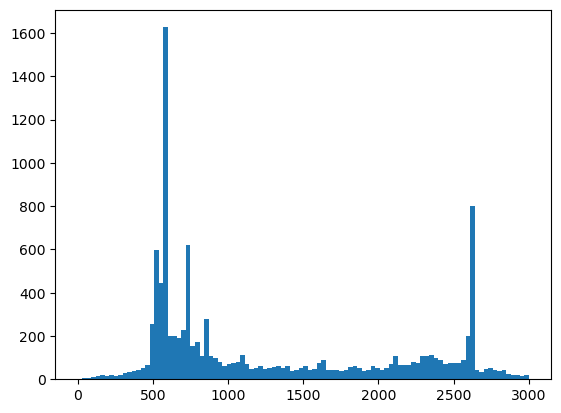

In [28]:
plt.figure()

_ = plt.hist(all_data.col_1990, range=(0,3000), bins=100)

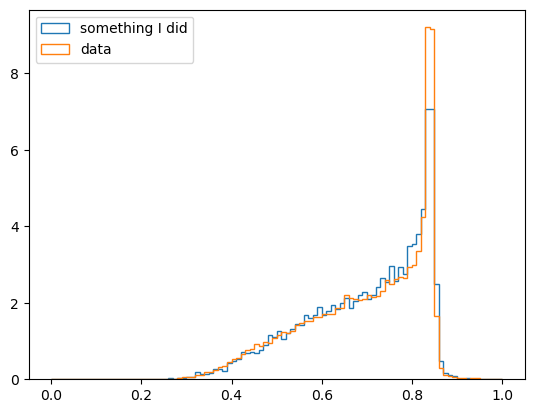

In [29]:
plt.figure()

_ = plt.hist(all_data.col_1991, range=(0,1), bins=100, histtype='step', density=True, label='something I did')
_ = plt.hist(df_data.AoEs, range=(0,1), bins=100, histtype='step', density=True, label='data')

plt.legend()

In [30]:
_, data, _, _ = train_test_split(df_data, df_data,test_size=1/3, random_state=42)

def calc_quant(data, vals):
    n = data.shape[1]
    left = np.count_nonzero(vals < data, axis=1)
    right = np.count_nonzero(vals <= data, axis=1)
    pct = (right + left + np.where(right>left, 1+0*right, 0*right)) /(2*n)
    return pct

batch_size=5000
num_samples = 1000
bins=100

In [58]:
columns = ['Column1', 'Column2']

# Create DataFrames
median_prediction_df = pd.DataFrame(columns=columns)
mean_prediction_df = pd.DataFrame(columns=columns)
gen_quantile_df = pd.DataFrame(columns=columns)

total_samples = data.shape[0]
for x in range(total_samples//batch_size+1):
    actual_batch_size = min((x+1)*batch_size, total_samples)- x*batch_size
    
    # Extract the batch from the DataFrame
    batch_data = all_data.iloc[x*batch_size:min((x + 1) * batch_size, total_samples)]

    # Convert DataFrame to NumPy array
    data_array = batch_data.to_numpy()

    reshaped_array = data_array.reshape(data_array.shape[0]*data_array.shape[1]//output_dims, output_dims)

    # true_data = df_data[['Es', 'AoEs']].iloc[x*batch_size:min((x+1)*batch_size, total_samples)].to_numpy()
    true_data = new_test_out[x*batch_size:min((x + 1) * batch_size, total_samples), :]
    
    reshaped_data = reshaped_array.reshape(
        (reshaped_array.shape[0]//actual_batch_size, actual_batch_size, output_dims),
        order="f"
    )

    all_quants = []
    all_means = []
    all_medians = []

    for y in range(output_dims):
        true_val = reshaped_data[:,:,y].T
        pred_val = true_data[:,y:y+1] # This order is in the file - not sure why they are named this way
        # pred_val = reshaped_data[:,:,y].T
        # true_val = true_data[:,y:y+1]
        quants = calc_quant(true_val, pred_val)
        medians = np.median(reshaped_data[:,:,y], axis=0)
        means = np.mean(reshaped_data[:,:,y], axis=0)

        all_quants.append(np.expand_dims(quants, axis=1))
        all_medians.append(np.expand_dims(medians, axis=1))
        all_means.append(np.expand_dims(means, axis=1))

    all_quants_df = pd.DataFrame(np.concatenate(all_quants, axis=1), columns=columns)
    all_medians_df = pd.DataFrame(np.concatenate(all_medians, axis=1), columns=columns)
    all_means_df = pd.DataFrame(np.concatenate(all_means, axis=1), columns=columns)

    median_prediction_df = pd.concat([median_prediction_df, all_medians_df], ignore_index=True)
    mean_prediction_df = pd.concat([mean_prediction_df, all_means_df], ignore_index=True)
    gen_quantile_df = pd.concat([gen_quantile_df, all_quants_df], ignore_index=True) 
    
    print(str(100*min((x+1)*batch_size, total_samples)/total_samples)+"% done")

/var/folders/sh/c4zm4mfn7xl1vd5v3vp3h5400000gn/T/ipykernel_62660/3464820362.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  median_prediction_df = pd.concat([median_prediction_df, all_medians_df], ignore_index=True)
/var/folders/sh/c4zm4mfn7xl1vd5v3vp3h5400000gn/T/ipykernel_62660/3464820362.py:50: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mean_prediction_df = pd.concat([mean_prediction_df, all_means_df], ignore_index=True)
/var/folders/sh/c4zm4mfn7xl1vd5v3vp3h5400000gn/T/ipykernel_62660

45.87997797761057% done
91.75995595522114% done
100.0% done


(array([111.,  84.,  82.,  84.,  82.,  89.,  81.,  82.,  94., 109.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

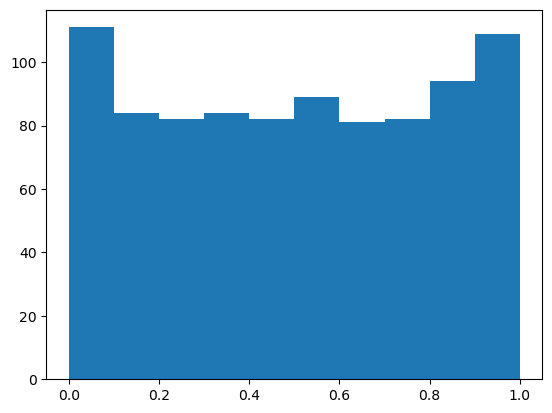

In [145]:
plt.hist(calc_quant(true_val, pred_val))

In [76]:
weights = np.where(np.isnan(median_prediction_df), 0, 1) # 
medians = np.where(np.isnan(median_prediction_df), 0, median_prediction_df)
absolute_error_medians = new_test_out-medians
error_medians = absolute_error_medians/new_test_out

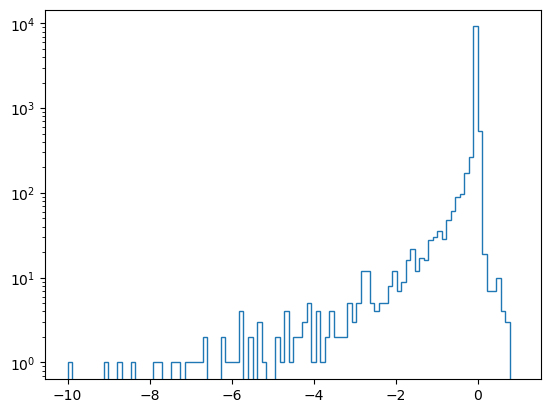

In [81]:
plt.figure()
plt.hist(error_medians[:,0], range=(-10,1), bins=100, histtype='step')
plt.yscale('log')


In [142]:
all_counts=[]
all_edges=[]
quant_counts=[]
quant_edges=[]
total_counts = 0
bins=50

ranges= [[0,3000],[0,1]]

for x in range(total_samples//batch_size+1):

    pred_counts=[]
    actual_batch_size = min((x+1)*batch_size, total_samples)- x*batch_size

    # recoData = f.root.recoData[x*batch_size:min((x+1)*batch_size, total_samples),:]
    #rawRecoData =f.root.rawRecoData[x*batch_size:min((x+1)*batch_size, total_samples),:]
    #predData = f.root.data[x*batch_size:min((x+1)*batch_size, total_samples),:]
    #genData = f.root.genData[x*batch_size:min((x+1)*batch_size, total_samples),:]
    temp_ydata = ydata[x*batch_size:min((x+1)*batch_size, total_samples),:]
    pred_data = all_data.to_numpy()[x*batch_size:min((x+1)*batch_size, total_samples),:]
    temp_xdata = xdata[x*batch_size:min((x+1)*batch_size, total_samples),:]
    
    quants = gen_quantile_df.to_numpy()[x*batch_size:min((x+1)*batch_size, total_samples),:]
    weights = np.ones(temp_xdata[:,0].shape)
    total_counts+=np.sum(weights)

    for z in range(num_samples):
        current_data = pred_data[:,output_dims*z:output_dims*(z+1)]
        temp = []
        for y in range(output_dims):
            counts, _ = np.histogram(current_data[:,y], range=ranges[y], bins=bins, weights=weights)
            temp.append(counts)
        pred_counts.append(temp)
    pred_counts = np.array(pred_counts)

    for y in range(output_dims):
        #reco_counts, edges = np.histogram(recoData[:,y], range=ranges[y], bins=bins, weights=weights)
        true_counts, edges = np.histogram(temp_ydata[:,y], range=ranges[y], bins=bins, weights=weights)
        edges = edges[1:]/2+edges[:-1]/2
        q_counts, q_edges = np.histogram(quants[:,y], range=(0,1), bins=bins, weights=weights)
        q_edges = q_edges[1:]

        if(x==0):
            # all_counts.append([reco_counts, pred_counts[:,y,:], gen_counts])
            all_counts.append([pred_counts[:,y,:], true_counts])
            all_edges.append(edges)
            quant_counts.append([q_counts])
            quant_edges.append(q_edges)
        else:
            # all_counts[y][0]+=reco_counts
            all_counts[y][0]+=pred_counts[:,y,:]
            all_counts[y][1]+=true_counts
            quant_counts[y] +=q_counts

print("Total counts", total_counts)    
print("Total samples", total_samples) 

Total counts 10898.0
Total samples 10898


In [150]:
q_counts

array([47., 20., 14., 14., 16.,  8., 17., 24., 20., 15., 19., 18., 17.,
       10., 15., 18., 16., 23., 13., 17., 17., 16., 18., 20., 11., 17.,
       17., 12., 19., 24., 15., 13., 12., 18., 23., 15., 14., 11., 21.,
       21., 18., 19., 25., 19., 13., 14., 31., 14., 17., 33.])

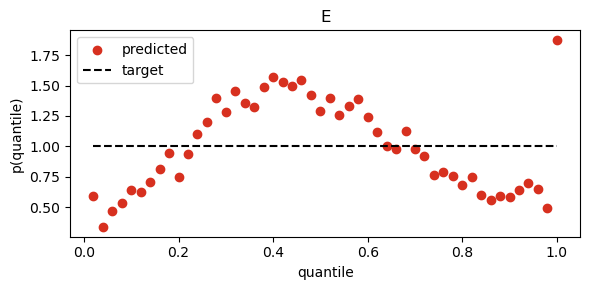

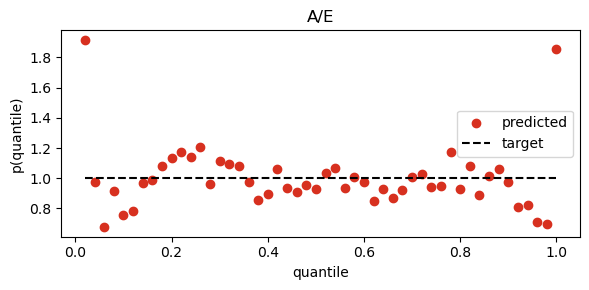

In [152]:
labels=["E", "A/E"]
titles=["E", "A/E"]
for x in range(output_dims):
    q_sums = [quant_counts[x][0,0]]
    for y in range(1, len(q_counts)):
        q_sums.append(q_sums[-1]+quant_counts[x][0,y])
    fig, (ax1) = plt.subplots(1, 1, figsize=(6,3))#, gridspec_kw={'height_ratios': [0.5, 1]})
    ax1.scatter(q_edges, bins*quant_counts[x][0,:]/np.sum(quant_counts[x][0,:]), c="#d7301f", label="predicted")
    ax1.plot(q_edges, q_edges*0+1, c="k", linestyle="--", label="target")
    # ax1.set_ylim((0.7,1.3))
    ax1.set_ylabel("p(quantile)")
    ax1.set_xlabel("quantile")
    ax1.set_title(labels[x])
    ax1.legend()
    plt.tight_layout()
    fig.subplots_adjust(wspace=0.0, hspace=0.1)

In [55]:
pred50 = []
pred16 = []
pred84 = []
for x in range(output_dims):
    pred50.append(np.quantile(all_counts[x][0], 0.5, axis=0))
    pred16.append(np.quantile(all_counts[x][0], 0.16, axis=0))
    pred84.append(np.quantile(all_counts[x][0], 0.84, axis=0))

/var/folders/sh/c4zm4mfn7xl1vd5v3vp3h5400000gn/T/ipykernel_62660/985581516.py:15: RuntimeWarning: invalid value encountered in divide
  ax2.scatter(all_edges[x], all_counts[x][1]/all_counts[x][1], color="k", marker="o",facecolors="none", s=5, linewidth=0.5)
/var/folders/sh/c4zm4mfn7xl1vd5v3vp3h5400000gn/T/ipykernel_62660/985581516.py:17: RuntimeWarning: divide by zero encountered in divide
  all_edges[x], pred50[x]/all_counts[x][1],
/var/folders/sh/c4zm4mfn7xl1vd5v3vp3h5400000gn/T/ipykernel_62660/985581516.py:17: RuntimeWarning: invalid value encountered in divide
  all_edges[x], pred50[x]/all_counts[x][1],
/var/folders/sh/c4zm4mfn7xl1vd5v3vp3h5400000gn/T/ipykernel_62660/985581516.py:18: RuntimeWarning: divide by zero encountered in divide
  xerr=0, yerr=[pred50[x]/all_counts[x][1]- pred16[x]/all_counts[x][1], pred84[x]/all_counts[x][1]-pred50[x]/all_counts[x][1]],
/var/folders/sh/c4zm4mfn7xl1vd5v3vp3h5400000gn/T/ipykernel_62660/985581516.py:18: RuntimeWarning: invalid value encountere

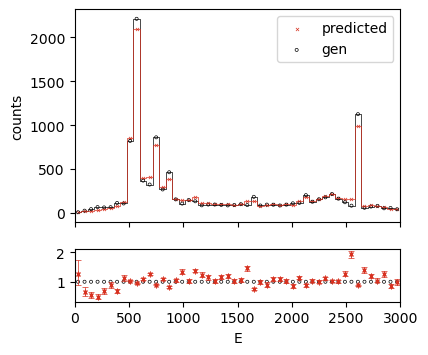

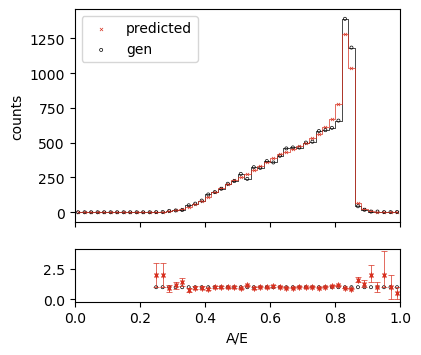

In [56]:
for x in range(output_dims):      
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(3.5*3/2.5,3.8), gridspec_kw={'height_ratios': [2,0.5]})
    
    ax1.step(all_edges[x], all_counts[x][1], where="mid", color="k", linewidth=0.5)#, linestyle="-.")
    ax1.step(all_edges[x], pred50[x], where="mid", color="#d7301f", linewidth=0.5)
    ax1.scatter(all_edges[x], pred50[x], label="predicted", color="#d7301f", marker="x", s=5, linewidth=0.5)
    ax1.scatter(all_edges[x], all_counts[x][1], label="gen",  color="k",facecolors='none', marker="o", s=5, linewidth=0.5)
    
    ax1.set_xlim(ranges[x])
    # ax1.set_ylim(0, max(all_counts[x][0])*1.1)
    ax1.set_ylabel("counts")
    ax1.set_xticklabels([])
    ax1.legend()
    
    ax2.scatter(all_edges[x], all_counts[x][1]/all_counts[x][1], color="k", marker="o",facecolors="none", s=5, linewidth=0.5)
    ax2.errorbar(
        all_edges[x], pred50[x]/all_counts[x][1],
        xerr=0, yerr=[pred50[x]/all_counts[x][1]- pred16[x]/all_counts[x][1], pred84[x]/all_counts[x][1]-pred50[x]/all_counts[x][1]],
        color="#d7301f", ls="",
        capsize=2,capthick=0.5, marker="x", linewidth=0.5, markersize=np.sqrt(5)
    )

    ax2.set_xlabel(labels[x])
    #ax2.set_ylabel(r"$\frac{\textnormal{predicted}}{\textnormal{gen}}$")
    # ax2.set_ylim((0.9,1.1))
    ax2.set_xlim(ranges[x])
    
    # plt.tight_layout()
    #fig.subplots_adjust(wspace=0.0, hspace=0.1)

(5, 1089800) (2, 1089800) (1, 1089800) (1, 1089800)


2024-07-25 11:09:46.328910: I external/local_xla/xla/service/service.cc:168] XLA service 0x311b9bb10 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2024-07-25 11:09:46.328932: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2024-07-25 11:09:46.395560: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1721920186.789793 12283009 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-07-25 11:09:46.793278: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


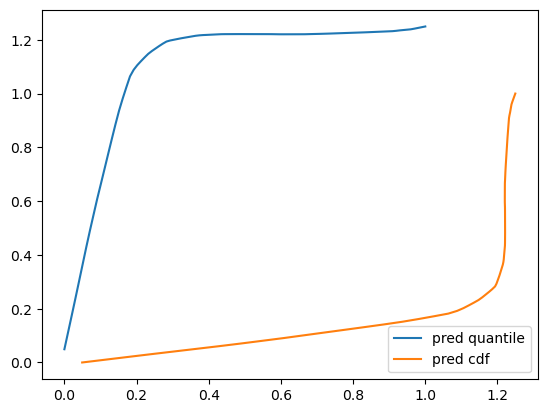

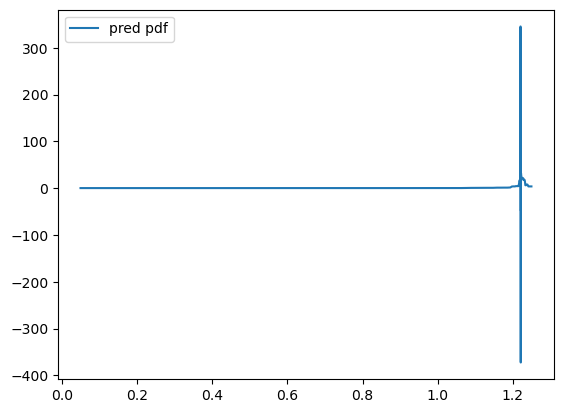

In [38]:
# Generate pdf and cdf for 10,000 quantiles between 0 and 1
quants = tf.cast(np.linspace(0, 1, 100), tf.float32)
cdf, pdf, quantiles = predict_dist(
    model,  # Model object
    quants,    # Quantiles to sample at
    tf.transpose(tf.cast(new_test_in_norm, tf.float32)),  # Input examples
    tf.transpose(tf.cast(new_test_in_norm, tf.float32)).shape[1],  # Number of input examples
    0,  # Current sampling dim
    tf.transpose(tf.cast(new_test_in_norm, tf.float32)).shape[0],  # Input dim
    2, # Output dim
    network_type='no normalizing'
) 

# pdf, cdf, and quantile function for 1st dimension
plt.plot(quantiles, cdf[0, :], label="pred quantile")
plt.plot(cdf[0, :], quantiles, label="pred cdf")
plt.legend()

plt.figure()
plt.plot(cdf[0, :], pdf[0, :], label="pred pdf")
plt.legend()


In [63]:

# Generate pdf and cdf for 10,000 quantiles between 0 and 1
quants = tf.cast(np.linspace(0, 1, 10), tf.float32)
cdf, pdf, quantiles = predict_dist(
    model,  # Model object
    quants,    # Quantiles to sample at
    tf.transpose(current_test_in),  # Input examples
    tf.transpose(current_test_in).shape[1],  # Number of input examples
    1,  # Current sampling dim
    tf.transpose(current_test_in).shape[0],  # Input dim
    2, # Output dim
    previous_samples=tf.transpose(current_test_in),
    network_type='no normalizing'
) 

# pdf, cdf, and quantile function for 1st dimension
plt.plot(quantiles, cdf[0, :], label="pred quantile")
plt.plot(cdf[0, :], quantiles, label="pred cdf")
plt.legend()

plt.figure()
plt.plot(cdf[0, :], pdf[0, :], label="pred pdf")
plt.legend()


ValueError: in user code:

    File "/Users/williamquinn/Documents/legend/quantileNetwork.py", line 671, in predict_no_normalizing  *
        val = layer(val)
    File "/Users/williamquinn/anaconda3/envs/tfenv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "/Users/williamquinn/anaconda3/envs/tfenv/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 9, but received input with shape (8980, 13)
